## 数据准备

In [57]:
from pandas import read_csv
from datetime import datetime


# 将字符串转换为datetime对象
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')


# 使用read_csv函数读取'raw.csv'文件，并将其中包含'year', 'month', 'day', 'hour'的列作为日期列
# index_col=0 表示将第一列设置为索引列
# date_parser=parse 表示使用自定义的 parse 函数来解析日期列
dataset = read_csv('data/空气质量预测/raw.csv', parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
print(dataset.head(5))

# 使用drop函数删除名为'No'的列，axis=1表示操作的是列，inplace=True表示原地修改
dataset.drop('No', axis=1, inplace=True)
print(dataset.head(5))

C:\Users\shey\AppData\Local\Temp\ipykernel_17880\1880832876.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv('data/空气质量预测/raw.csv', parse_dates=[['year', 'month', 'day', 'hour']], index_col=0,


                     No  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
year_month_day_hour                                                   
2010-01-01 00:00:00   1    NaN   -21 -11.0  1021.0   NW   1.79   0   0
2010-01-01 01:00:00   2    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2010-01-01 02:00:00   3    NaN   -21 -11.0  1019.0   NW   6.71   0   0
2010-01-01 03:00:00   4    NaN   -21 -14.0  1019.0   NW   9.84   0   0
2010-01-01 04:00:00   5    NaN   -20 -12.0  1018.0   NW  12.97   0   0
                     pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
year_month_day_hour                                               
2010-01-01 00:00:00    NaN   -21 -11.0  1021.0   NW   1.79   0   0
2010-01-01 01:00:00    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2010-01-01 02:00:00    NaN   -21 -11.0  1019.0   NW   6.71   0   0
2010-01-01 03:00:00    NaN   -21 -14.0  1019.0   NW   9.84   0   0
2010-01-01 04:00:00    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [58]:
# 手动指定列名，将列名设置为['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
print(dataset.head(5))

dataset.index.name = 'date'
print(dataset.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
year_month_day_hour                                                           
2010-01-01 00:00:00        NaN  -21 -11.0  1021.0      NW     1.79     0     0
2010-01-01 01:00:00        NaN  -21 -12.0  1020.0      NW     4.92     0     0
2010-01-01 02:00:00        NaN  -21 -11.0  1019.0      NW     6.71     0     0
2010-01-01 03:00:00        NaN  -21 -14.0  1019.0      NW     9.84     0     0
2010-01-01 04:00:00        NaN  -20 -12.0  1018.0      NW    12.97     0     0
                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-01 00:00:00        NaN  -21 -11.0  1021.0      NW     1.79     0     0
2010-01-01 01:00:00        NaN  -21 -12.0  1020.0      NW     4.92     0     0
2010-01-01 02:00:00        NaN  -21 -11.0  1019.0      NW     6.71     0     0
2010-01-01 03:00:00        NaN  -21 -14.0  1019.0   

In [59]:
# 使用fillna函数将'pollution'列中的所有NA值替换为0，inplace=True表示原地修改
dataset['pollution'].fillna(0, inplace=True)
print(dataset.head(5))

dataset = dataset[24:]
print(dataset.head(5))

dataset.to_csv('data/空气质量预测/pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-01 00:00:00        0.0  -21 -11.0  1021.0      NW     1.79     0     0
2010-01-01 01:00:00        0.0  -21 -12.0  1020.0      NW     4.92     0     0
2010-01-01 02:00:00        0.0  -21 -11.0  1019.0      NW     6.71     0     0
2010-01-01 03:00:00        0.0  -21 -14.0  1019.0      NW     9.84     0     0
2010-01-01 04:00:00        0.0  -20 -12.0  1018.0      NW    12.97     0     0
                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0   

## 数据画图显示

[[129.0 -16 -4.0 ... 1.79 0 0]
 [148.0 -15 -4.0 ... 2.68 0 0]
 [159.0 -11 -5.0 ... 3.57 0 0]
 ...
 [10.0 -22 -3.0 ... 242.7 0 0]
 [8.0 -22 -4.0 ... 246.72 0 0]
 [12.0 -21 -3.0 ... 249.85 0 0]]


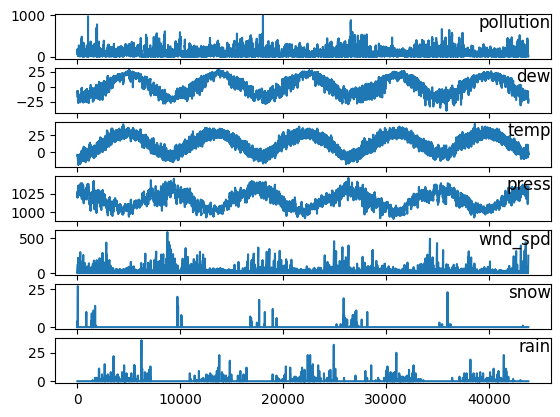

In [60]:
from pandas import read_csv
from matplotlib import pyplot

dataset = read_csv('data/空气质量预测/pollution.csv', header=0, index_col=0)
values = dataset.values
groups = [0, 1, 2, 3, 5, 6, 7]

i = 1
pyplot.figure()  # 创建一个图形
print(values)

for group in groups:
    pyplot.subplot(len(groups), 1, i)  # 创建一个子图
    pyplot.plot(values[:, group])  # 绘制数据
    pyplot.title(dataset.columns[group], y=0.5, loc='right')  # 设置标题
    i += 1  # 更新i用来设置下一个子图

pyplot.show()

## 数据转换成监督学习数据

In [61]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd

pd.set_option('display.max_columns', 1000)  # 设置显示的最大列数
pd.set_option('display.width', 1000)  # 设置显示的最大宽度
pd.set_option('display.max_colwidth', 1000)  # 设置显示的最大列宽

In [62]:
dataset = read_csv('data/空气质量预测/pollution.csv', header=0, index_col=0)
values = dataset.values
print(values)

[[129.0 -16 -4.0 ... 1.79 0 0]
 [148.0 -15 -4.0 ... 2.68 0 0]
 [159.0 -11 -5.0 ... 3.57 0 0]
 ...
 [10.0 -22 -3.0 ... 242.7 0 0]
 [8.0 -22 -4.0 ... 246.72 0 0]
 [12.0 -21 -3.0 ... 249.85 0 0]]


In [63]:
encoder = LabelEncoder()  # 创建一个LabelEncoder对象
values[:, 4] = encoder.fit_transform(values[:, 4])  # 将'wnd_dir'列的值转换为数字
print(values)
print()
values = values.astype('float32')  # 将数据转换为浮点数
scaler = MinMaxScaler(feature_range=(0, 1))  # 创建一个MinMaxScaler对象
scaled = scaler.fit_transform(values)  # 将数据缩放到0到1之间
print(scaled)

[[129.0 -16 -4.0 ... 1.79 0 0]
 [148.0 -15 -4.0 ... 2.68 0 0]
 [159.0 -11 -5.0 ... 3.57 0 0]
 ...
 [10.0 -22 -3.0 ... 242.7 0 0]
 [8.0 -22 -4.0 ... 246.72 0 0]
 [12.0 -21 -3.0 ... 249.85 0 0]]

[[0.12977867 0.35294122 0.24590163 ... 0.00229001 0.         0.        ]
 [0.14889336 0.36764708 0.24590163 ... 0.00381099 0.         0.        ]
 [0.15995975 0.4264706  0.22950819 ... 0.00533197 0.         0.        ]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.41399646 0.         0.        ]
 [0.00804829 0.2647059  0.24590163 ... 0.4208665  0.         0.        ]
 [0.01207243 0.2794118  0.26229507 ... 0.42621556 0.         0.        ]]


转换成监督学习数据

In [64]:
n_in = 1
n_out = 1
dropnan = True

n_vars = 1 if type(scaled) is list else scaled.shape[1] # 如果scaled是一个列表，则n_vars为1，否则为scaled的列数
df = DataFrame(scaled) # 将scaled转换为DataFrame
print(df.head())

          0         1         2         3         4         5         6    7
0  0.129779  0.352941  0.245902  0.527273  0.666667  0.002290  0.000000  0.0
1  0.148893  0.367647  0.245902  0.527273  0.666667  0.003811  0.000000  0.0
2  0.159960  0.426471  0.229508  0.545454  0.666667  0.005332  0.000000  0.0
3  0.182093  0.485294  0.229508  0.563637  0.666667  0.008391  0.037037  0.0
4  0.138833  0.485294  0.229508  0.563637  0.666667  0.009912  0.074074  0.0


In [65]:
clos, names = list(), list() # 创建一个空列表clos和names
for i in range(n_in, 0, -1): # 创建一个从n_in到0的循环
    clos.append(df.shift(i)) # 创建一个滞后为i的DataFrame
    print(clos)
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] # 创建一个名字列表

[              0         1         2         3         4         5         6    7
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN
1      0.129779  0.352941  0.245902  0.527273  0.666667  0.002290  0.000000  0.0
2      0.148893  0.367647  0.245902  0.527273  0.666667  0.003811  0.000000  0.0
3      0.159960  0.426471  0.229508  0.545454  0.666667  0.005332  0.000000  0.0
4      0.182093  0.485294  0.229508  0.563637  0.666667  0.008391  0.037037  0.0
...         ...       ...       ...       ...       ...       ...       ...  ...
43795  0.010060  0.264706  0.278689  0.763638  0.333333  0.385730  0.000000  0.0
43796  0.008048  0.250000  0.278689  0.781818  0.333333  0.395659  0.000000  0.0
43797  0.010060  0.264706  0.262295  0.781818  0.333333  0.405588  0.000000  0.0
43798  0.010060  0.264706  0.262295  0.781818  0.333333  0.413996  0.000000  0.0
43799  0.008048  0.264706  0.245902  0.781818  0.333333  0.420866  0.000000  0.0

[43800 rows x 8 columns]]


In [66]:
for i in range(0, n_out): # 创建一个从0到n_out的循环
    clos.append(df.shift(-i)) # 创建一个超前为i的DataFrame
    print(clos)
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)] # 创建一个名字列表
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] # 创建一个名字列表
print(clos)

[              0         1         2         3         4         5         6    7
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN
1      0.129779  0.352941  0.245902  0.527273  0.666667  0.002290  0.000000  0.0
2      0.148893  0.367647  0.245902  0.527273  0.666667  0.003811  0.000000  0.0
3      0.159960  0.426471  0.229508  0.545454  0.666667  0.005332  0.000000  0.0
4      0.182093  0.485294  0.229508  0.563637  0.666667  0.008391  0.037037  0.0
...         ...       ...       ...       ...       ...       ...       ...  ...
43795  0.010060  0.264706  0.278689  0.763638  0.333333  0.385730  0.000000  0.0
43796  0.008048  0.250000  0.278689  0.781818  0.333333  0.395659  0.000000  0.0
43797  0.010060  0.264706  0.262295  0.781818  0.333333  0.405588  0.000000  0.0
43798  0.010060  0.264706  0.262295  0.781818  0.333333  0.413996  0.000000  0.0
43799  0.008048  0.264706  0.245902  0.781818  0.333333  0.420866  0.000000  0.0

[43800 rows x 8 columns], 

In [67]:
agg = concat(clos, axis=1) # 将clos中的数据连接起来
print(agg.head())
agg.columns = names # 设置列名
print(agg.head())
if dropnan: # 如果dropnan为True
    agg.dropna(inplace=True) # 删除含有缺失值的行
    print(agg.head())

          0         1         2         3         4         5         6    7         0         1         2         3         4         5         6    7
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN  0.129779  0.352941  0.245902  0.527273  0.666667  0.002290  0.000000  0.0
1  0.129779  0.352941  0.245902  0.527273  0.666667  0.002290  0.000000  0.0  0.148893  0.367647  0.245902  0.527273  0.666667  0.003811  0.000000  0.0
2  0.148893  0.367647  0.245902  0.527273  0.666667  0.003811  0.000000  0.0  0.159960  0.426471  0.229508  0.545454  0.666667  0.005332  0.000000  0.0
3  0.159960  0.426471  0.229508  0.545454  0.666667  0.005332  0.000000  0.0  0.182093  0.485294  0.229508  0.563637  0.666667  0.008391  0.037037  0.0
4  0.182093  0.485294  0.229508  0.563637  0.666667  0.008391  0.037037  0.0  0.138833  0.485294  0.229508  0.563637  0.666667  0.009912  0.074074  0.0
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1

In [68]:
agg.drop(agg.columns[[9, 10, 11, 12, 13, 14, 15]], axis=1, inplace=True) # 删除不需要的列
print(agg.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1)   var1(t)
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   0.000000        0.0  0.148893
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   0.000000        0.0  0.159960
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   0.000000        0.0  0.182093
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   0.037037        0.0  0.138833
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   0.074074        0.0  0.109658


In [69]:
values = agg.values # 将agg转换为numpy数组
print(values)

[[0.12977867 0.35294122 0.24590163 ... 0.         0.         0.14889336]
 [0.14889336 0.36764708 0.24590163 ... 0.         0.         0.15995975]
 [0.15995975 0.4264706  0.22950819 ... 0.         0.         0.18209255]
 ...
 [0.01006036 0.2647059  0.26229507 ... 0.         0.         0.01006036]
 [0.01006036 0.2647059  0.26229507 ... 0.         0.         0.00804829]
 [0.00804829 0.2647059  0.24590163 ... 0.         0.         0.01207243]]


In [70]:
n_train_hours = 365 * 24
train = values[:n_train_hours, :] # 创建一个训练集
test = values[n_train_hours:, :] # 创建一个测试集
print(train.shape, test.shape)

(8760, 9) (35039, 9)


In [71]:
train_X, train_y = train[:, :-1], train[:, -1] # 创建一个训练集的特征和标签
test_X, test_y = test[:, :-1], test[:, -1] # 创建一个测试集的特征和标签
print(train_X.shape, len(train_X))

(8760, 8) 8760


In [72]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1])) # 将训练集的特征转换为三维数组
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1])) # 将测试集的特征转换为三维数组
print(train_X.shape, test_X.shape)

(8760, 1, 8) (35039, 1, 8)


Epoch 1/50
122/122 - 3s - loss: 0.0071 - val_loss: 0.0068 - 3s/epoch - 23ms/step
Epoch 2/50
122/122 - 1s - loss: 0.0038 - val_loss: 0.0077 - 647ms/epoch - 5ms/step
Epoch 3/50
122/122 - 1s - loss: 0.0020 - val_loss: 0.0080 - 714ms/epoch - 6ms/step
Epoch 4/50
122/122 - 1s - loss: 0.0013 - val_loss: 0.0069 - 828ms/epoch - 7ms/step
Epoch 5/50
122/122 - 1s - loss: 0.0012 - val_loss: 0.0055 - 622ms/epoch - 5ms/step
Epoch 6/50
122/122 - 1s - loss: 0.0011 - val_loss: 0.0044 - 654ms/epoch - 5ms/step
Epoch 7/50
122/122 - 1s - loss: 0.0010 - val_loss: 0.0037 - 642ms/epoch - 5ms/step
Epoch 8/50
122/122 - 1s - loss: 0.0010 - val_loss: 0.0032 - 600ms/epoch - 5ms/step
Epoch 9/50
122/122 - 1s - loss: 9.9574e-04 - val_loss: 0.0029 - 682ms/epoch - 6ms/step
Epoch 10/50
122/122 - 1s - loss: 9.8682e-04 - val_loss: 0.0027 - 838ms/epoch - 7ms/step
Epoch 11/50
122/122 - 1s - loss: 9.8093e-04 - val_loss: 0.0026 - 715ms/epoch - 6ms/step
Epoch 12/50
122/122 - 1s - loss: 9.7691e-04 - val_loss: 0.0025 - 649ms/epoc

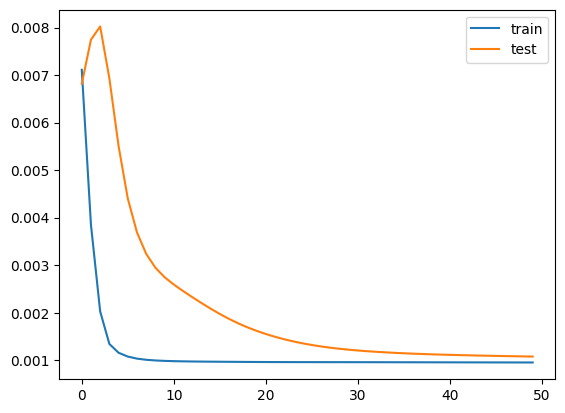

In [73]:
from keras.src.layers import LSTM, Dense
from keras import Sequential

model = Sequential() # 创建一个Sequential模型
# model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]))) # 添加一个LSTM层
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))) # 添加一个LSTM层
# model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]))) # 添加一个LSTM层

model.add(Dense(1)) # 添加一个全连接层

model.compile(optimizer='adam', loss='mse') # 编译模型

history = model.fit(train_X, train_y, epochs=50, batch_size=72, verbose=2, validation_data=(test_X, test_y), shuffle=False) # 训练模型

pyplot.plot(history.history['loss'], label='train') # 绘制训练集的损失曲线
pyplot.plot(history.history['val_loss'], label='test') # 绘制测试集的损失曲线
pyplot.legend() # 显示图例
pyplot.show() # 显示图形

## 预测(一天预测一天)

In [77]:
yhat_test = model.predict(test_X) # 预测测试集的结果
print(yhat_test[:10, :])

print(test_X[0:6, :])

1095/1095 [==============================] - 1s 1ms/step
[[0.0322089 ]
 [0.03159105]
 [0.02111293]
 [0.01697933]
 [0.01950288]
 [0.01800634]
 [0.01243127]
 [0.01573312]
 [0.0227061 ]
 [0.0221218 ]]
[[[0.0362173  0.33823532 0.1967213  0.83636475 0.33333334 0.12757413
   0.         0.        ]]

 [[0.03118712 0.33823532 0.1967213  0.83636475 0.         0.006101
   0.         0.        ]]

 [[0.02012072 0.33823532 0.1967213  0.83636475 0.         0.0145091
   0.         0.        ]]

 [[0.01911469 0.32352942 0.18032786 0.83636475 0.33333334 0.006101
   0.         0.        ]]

 [[0.01810865 0.32352942 0.18032786 0.83636475 0.         0.006101
   0.         0.        ]]

 [[0.01710262 0.32352942 0.1967213  0.83636475 0.         0.01297103
   0.         0.        ]]]


In [79]:
from numpy import concatenate

test_X = test_X.reshape((test_X.shape[0], test_X.shape[2])) # 将测试集的特征转换为二维数组
inv_yhat = concatenate((yhat_test, test_X[:, 1:]), axis=1) # 将预测结果拼接起来
inv_yhat = scaler.inverse_transform(inv_yhat) # 将预测结果还原成原始值
inv_yhat = inv_yhat[:, 0] # 获取预测值
print(inv_yhat)

[32.015648  31.401508  20.986252  ...  4.7611775  4.7878184  3.3710732]


In [80]:
test_y = test_y.reshape((len(test_y), 1)) # 将测试集的标签转换为二维数组
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1) # 将真实值拼接起来
inv_y = scaler.inverse_transform(inv_y) # 将真实值还原成原始值
inv_y = inv_y[:, 0] # 获取真实值
print(inv_y)

[31. 20. 19. ... 10.  8. 12.]


In [81]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat)) # 计算均方根误差
print('Test RMSE: %.3f' % rmse)

Test RMSE: 32.637


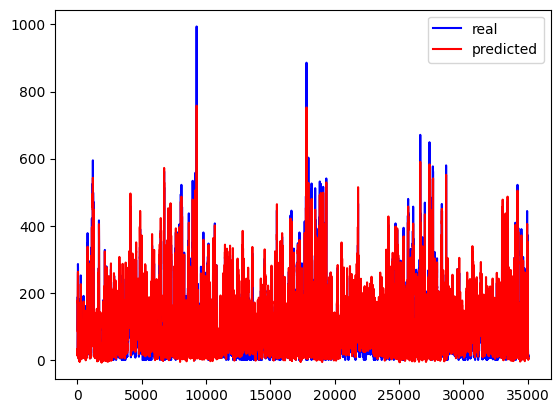

In [82]:
import matplotlib.pyplot as plt

# 绘制预测结果和真实值的对比图
plt.plot(inv_y, color='blue', label='real')
plt.plot(inv_yhat, color='red', label='predicted')
plt.legend()
plt.show()